In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1><center> Travaux pratiques: 
    
    Algorithme de descente de gradient à pas fixe
</center></h1>

## 1. Coder la fonction de Rosenbrock

Fonction de Rosenbrock:
$$
f_p\left(X=(x,y)\right) = (x - 1)^2 + p (x^2 -y)^2
$$

Cette fonction atteint son minimum en $x_\star=(1,1)$. On cherchera à retrouver ce minimiseur en utilisant l'algorithme de descente de gradient à pas fixe.

__Coder une fonction `Rosenbrock(x)` où l'argument `x` est un `np.array` de longueur 2, et retourner la valeur de la fonction en ce point `x`.__ On défini `p=10` au préalable à l'extérieur de fonction.

In [2]:
p = 10

def Rosenbrock(x):
    return (x[0]-1)**2 + p * (x[0]**2-x[1])**2

x = np.array([2,3])
Rosenbrock(x)

11

## 2. Coder la fonction gradient de Rosenbrock

__Coder une fonction `gradientRosenbrock(x)` où l'argument `x` est un `np.array` de longueur 2, et qui retourne $\nabla f_p(x)$ au format `np.array` de longueur 2.__

In [3]:
def gradientRosenbrock(x):
    df_dx = 2*x[0] - 2 + 4*p*x[0]*(x[0]**2-x[1])
    df_dy = 2* p * (x[1]-x[0]**2)
    return np.array([df_dx,df_dy])

x = np.array([2,3])
gradientRosenbrock(x)

array([ 82, -20])

## 3. Coder une fonction d'affichage des isovaleurs

__Coder une fonction `isovalRos(a, b, c, d)` dessinant les isovaleurs de $f_P$ sur le pavé $[a,b]\times[c,d]$.__

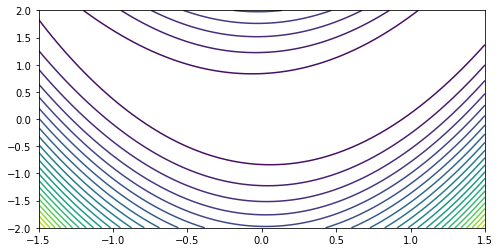

In [4]:
a,b,c,d = -1.5, 1.5, -2, 2

def isovalRos(a, b, c, d, n=100):
    x = np.linspace(a,b,n)
    y = np.linspace(c,d,n)
    X, Y = np.meshgrid(x,y)
    Z = (X-1)**2 + p*(X**2-Y)**2
    plt.figure(figsize=(8,4))
    plt.contour(X,Y,Z,30)
    
isovalRos(a,b,c,d)

## 4. Coder l'algorithme de descente de gradient à pas fixe

__Coder une fonction `GradientDescent` ayant pour arguments:__
- `gf`, une fonction de calcul du gradient de la fonction à minimiser
- `rho`, la longueur des pas effectués à chaque itération
- `x0`, un point initial
- `epsilon`, une tolérance sur la quasi-nullité du gradient.

__Cette fonction doit retourner:__
- `steps`, l'historique des points explorés lors de la descente
- `hist_norm_gf_x`, l'historique des normes de gradient succesives.


In [5]:
def GradientDescent(gf, rho, x0, epsilon):
    steps = [x0]
    
    
    x = x0
    gf_x = gf(x)
    norm_gf_x= np.linalg.norm(gf_x)
    hist_norm_gf_x = [norm_gf_x]
    
    while norm_gf_x> epsilon:
        x = x - rho * gf_x
        gf_x = gf(x)
        norm_gf_x= np.linalg.norm(gf_x)
        
        steps.append(x)
        hist_norm_gf_x.append(norm_gf_x)
    
    steps = np.array(steps)
    hist_norm_gf_x = np.array(hist_norm_gf_x)
    return steps, hist_norm_gf_x

## 5. Faire une simulation

- partir du point $x_0=(-1,1)$
- utiliser un pas $\rho=0.01$
- considérer une tolérance $\varepsilon = 10^{-3}$

<h5><span style="color:blue">$\implies$Vérifier que le dernier point calculé est pertinent au regard de $x_\star$.</span></h5>

In [6]:
x0 = np.array([-1,1])
rho = 0.01
epsilon = 1e-3

steps, hist_norm_gf_x = GradientDescent(gradientRosenbrock,rho,x0, epsilon)

steps[-1]

array([0.99888596, 0.9977284 ])

### 5.1 Afficher la trajectoire

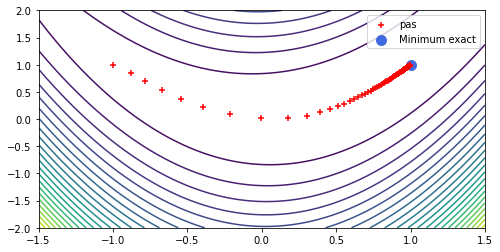

In [7]:
isovalRos(a,b,c,d)
sub_sampling = 10
plt.scatter(steps[::sub_sampling,0],steps[::sub_sampling,1], label='pas',marker='+',c='r');
plt.scatter([1],[1], label='Minimum exact',marker='o',c='royalblue',zorder=-1,linewidth=5)
plt.legend();

### 5.2 Afficher l'évolution de la norme du gradient

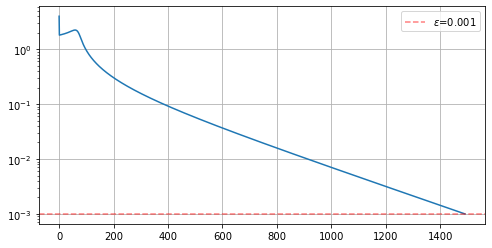

In [8]:
plt.figure(figsize=(8,4))
plt.plot(hist_norm_gf_x)
plt.axhline(epsilon,label=fr'$\varepsilon$={epsilon}',c='r',alpha=0.5,linestyle='--')
plt.grid();
plt.legend();
plt.semilogy();